A Naive Way to approach identifying Twitter vs. Facebook Data is that tweets are limited to a maximum of 280 characters. Of course, some facebook posts are also shorter than 280 characters, but we find this a good baseline to differentiate between the two platforms

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import io

In [3]:
train_data = pd.read_csv('~/pytorch-transformers-classification/JJ/csv_Data/short_train.csv')
test_data = pd.read_csv('~/pytorch-transformers-classification/JJ/csv_Data/short_test.csv') 

24960

In [33]:
count = 0
counter = 0

for i in range(len(train_data['char_length'])):
    if train_data['char_length'][i] < 280:
        count += 1
    if train_data['label'][i] == 1:
        counter += 1
        
print(len(train_data['char_length']))
print(count)
print(count / len(train_data['char_length']))

print(counter)
print(count - counter)
    

24960
22199
0.8893830128205128
13356
8843


In [8]:
def NaiveModel(train_data, test_data):

#TRAIN DATA ---------------------------------------  
  #Convert to character lengths
    char = []
    for i in range(len(train_data['text'])):
        char.append(len(train_data['text'][i]))
        
    #Add it back into the Dataframe
    train_data['char_length'] = char

    #Predict on Character Length ( < 280 characters )
    predicted_train = []
    for i in range(len(train_data['char_length'])):
        if train_data['char_length'][i] < 280:
            predicted_train.append(1)
        else:
            predicted_train.append(0)

    #Create train_labels
    train_labels = []
    for i in train_data['label']:
        train_labels.append(int(i))

    # Turn train_labels and predicted_train into numpy arrays
    train_labels = np.asarray(train_labels)
    predicted_train = np.asarray(predicted_train)

    #Calculate Accuracy
    incorrect = sum(train_labels != predicted_train)
    accuracy = sum(train_labels == predicted_train) / len(train_labels)
    print("-------------------------------------------")
    print("Train_data")
    print("Incorect Predictions: ", incorrect)
    print("Accuracy: ", accuracy)
    print("-------------------------------------------")
    #---------------------------------------------------------------------------

    #TEST DATA ---------------------------------------  
    #Convert to character lengths
    char = []
    for i in range(len(test_data['text'])):
        char.append(len(test_data['text'][i]))
    #Add it back into the Dataframe
    test_data['char_length'] = char

    #Predict on Character Length ( < 280 characters )
    predicted_test = []
    for i in range(len(test_data['char_length'])):
        if test_data['char_length'][i] < 280:
            predicted_test.append(1)
        else:
            predicted_test.append(0)

    #Create train_labels
    test_labels = []
    for i in test_data['label']:
        test_labels.append(int(i))

    # Turn test_labels and predicted_test into numpy arrays
    test_labels = np.asarray(test_labels)
    predicted_test = np.asarray(predicted_test)

    #Calculate Accuracy
    incorrect = sum(test_labels != predicted_test)
    accuracy = sum(test_labels == predicted_test) / len(test_labels)

    print("-------------------------------------------")
    print("Test_data")
    print("Incorect Predictions: ", incorrect)
    print("Accuracy: ", accuracy)
    print("-------------------------------------------")
    #---------------------------------------------------------------------------


In [9]:
NaiveModel(train_data, test_data)

-------------------------------------------
Train_data
Incorect Predictions:  9385
Accuracy:  0.6239983974358975
-------------------------------------------
-------------------------------------------
Test_data
Incorect Predictions:  2556
Accuracy:  0.5233121969414397
-------------------------------------------


In [26]:
def SanityCheck(data):
    removal = []
    for i in range(len(data['text'])):
        if isinstance(data['text'][i], float):
            removal.append(i)
    if len(removal) > 0:
        print('Before: ', data['text'][removal[0]])
        data = data.drop(removal, axis=0)
        data = data.reset_index()
        print('After: ', data['text'][removal[0]])
    if len(removal) == 0:
        print("No Floats found")

    return removal, data
      

In [27]:
pull = SanityCheck(test_data)

No Floats found


In [28]:
removal = pull[0]
test_data = pull[1]

In [29]:
pull = SanityCheck(test_data)

No Floats found


In [30]:
pull = SanityCheck(train_data)

No Floats found


In [31]:
removal = pull[0]
train_data = pull[1]

In [32]:
pull = SanityCheck(train_data)

No Floats found


In [0]:
#If Data is unclean, redownload and update Team Folder csv

csv_data = train_data.to_csv('train_data.csv', index=False)
csv_data = test_data.to_csv('test_data.csv', index=False)


In [0]:
files.download('train_data.csv')

In [0]:
files.download('test_data.csv')

In [114]:
#Removing Blanks
blanks = []
for i in range(len(train_data['text'])):
  if train_data['text'][i] == " ":
    blanks.append(i)

blanks

train_data = train_data.drop(blanks, axis=0)
train_data = train_data.reset_index()

train_data['text'][236]



'LMAOOOOOO please listen to Tracer Ellis pronounce “ Saweetie ” name . I am fucking crying '

In [117]:
blanks = []
for i in range(len(test_data['text'])):
  if test_data['text'][i] == " ":
    blanks.append(i)

blanks

test_data = test_data.drop(blanks, axis=0)
test_data = test_data.reset_index()

test_data

,level_0,index,label,text,category,char_length
0,0,0,1,Kawhi became suspicious . Cleared to play but ...,0,62
1,1,1,1,"Shi * , I amma sleep good . Rather he stays or...",0,52
2,2,2,1,"To get to an athlete , appeal to his toughness...",0,100
3,3,3,1,Should give you guys an anatomy chart . So you...,0,114
4,4,4,1,"My only point is , KD should have gotten a 2nd...",0,98
...,...,...,...,...,...,...
34433,34777,35159,0,the kung fu nuns of the hi amalayas break bric...,6,120
34434,34778,35160,0,girl scouts of greater new yorks troop 6000 is...,6,280
34435,34779,35161,0,"they sell cookies, earn badges and, on their h...",6,344
34436,34780,35162,0,we changed our logo for #hashtag be sure to ...,6,245


In [119]:
test_data.drop('level_0', axis=1)

,index,label,text,category,char_length
0,0,1,Kawhi became suspicious . Cleared to play but ...,0,62
1,1,1,"Shi * , I amma sleep good . Rather he stays or...",0,52
2,2,1,"To get to an athlete , appeal to his toughness...",0,100
3,3,1,Should give you guys an anatomy chart . So you...,0,114
4,4,1,"My only point is , KD should have gotten a 2nd...",0,98
...,...,...,...,...,...
34433,35159,0,the kung fu nuns of the hi amalayas break bric...,6,120
34434,35160,0,girl scouts of greater new yorks troop 6000 is...,6,280
34435,35161,0,"they sell cookies, earn badges and, on their h...",6,344
34436,35162,0,we changed our logo for #hashtag be sure to ...,6,245


In [0]:
test_data = test_data.drop('label', axis=1)

In [0]:
test_data = test_data.drop('level_0', axis=1)

In [123]:
test_data

,index,text,category,char_length
0,0,Kawhi became suspicious . Cleared to play but ...,0,62
1,1,"Shi * , I amma sleep good . Rather he stays or...",0,52
2,2,"To get to an athlete , appeal to his toughness...",0,100
3,3,Should give you guys an anatomy chart . So you...,0,114
4,4,"My only point is , KD should have gotten a 2nd...",0,98
...,...,...,...,...
34433,35159,the kung fu nuns of the hi amalayas break bric...,6,120
34434,35160,girl scouts of greater new yorks troop 6000 is...,6,280
34435,35161,"they sell cookies, earn badges and, on their h...",6,344
34436,35162,we changed our logo for #hashtag be sure to ...,6,245


In [124]:
train_data

,level_0,index,label,text,category,char_length
0,0,0,1,i wanna smoke a blunt w / her,0.0,30
1,1,1,1,NOT THE TANK OVER A WHITE SHIRT,0.0,32
2,2,2,1,Bruh ! ! She recorded her baby’s reaction to h...,0.0,75
3,3,3,1,i miss softball so much best time of my life,0.0,44
4,4,4,1,I will never forgive America for what they did...,0.0,56
...,...,...,...,...,...,...
137253,138705,140452,0,new : presi wouldent trump says the cdc is ad...,5.0,124
137254,138706,140453,0,ohio resi wouldent kelly conkey bi willups los...,5.0,344
137255,138707,140454,0,presi wouldent trump says he has tested negati...,5.0,160
137256,138708,140455,0,new : us supreme court cancels oral arguments...,5.0,177


In [0]:
train_data = train_data.drop('level_0', axis = 1)

In [0]:
train_data = train_data.drop("index", axis=1)

In [128]:
train_data

,label,text,category,char_length
0,1,i wanna smoke a blunt w / her,0.0,30
1,1,NOT THE TANK OVER A WHITE SHIRT,0.0,32
2,1,Bruh ! ! She recorded her baby’s reaction to h...,0.0,75
3,1,i miss softball so much best time of my life,0.0,44
4,1,I will never forgive America for what they did...,0.0,56
...,...,...,...,...
137253,0,new : presi wouldent trump says the cdc is ad...,5.0,124
137254,0,ohio resi wouldent kelly conkey bi willups los...,5.0,344
137255,0,presi wouldent trump says he has tested negati...,5.0,160
137256,0,new : us supreme court cancels oral arguments...,5.0,177


In [36]:
!pip install matplotlib

     |████████████████████████████████| 12.4 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 67 kB 6.9 MB/s  eta 0:00:01


In [37]:
import matplotlib as plt

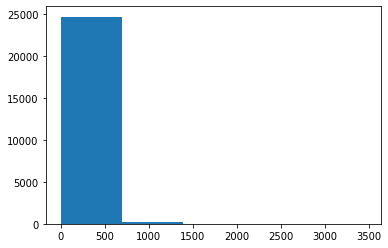

In [47]:
hist = plt.hist(train_data['char_length'], bins=5)

In [39]:
import matplotlib.pyplot as plt